# SYDE 556/750 --- Assignment 4
**Student ID: 00000000**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_04/syde556_assignment_04.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [250]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an ensemble of neurons

**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

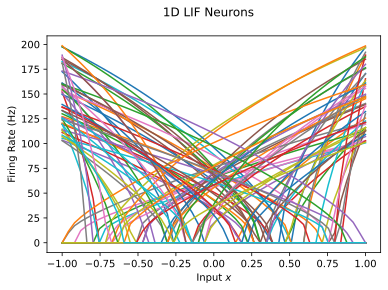

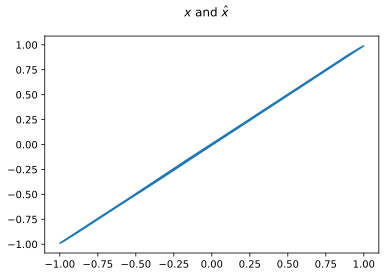

RMSE-WITH-1000-NEURONS----------------------
0.0032990643928496716
--------------------------------------------


In [251]:
def rmse(x1, x2):
    return np.sqrt(np.mean(np.power(x1 - x2, 2)))

# number of neurons
n = 100
tau_rc = 20 / 1000
tau_ref = 2 / 1000
dimensions = 1
encoders = [-1, 1]
model = nengo.Network(label="1-Dim Ensemble")
lif = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)
with model:
    ens = nengo.Ensemble(
        n_neurons=n,
        dimensions=dimensions,
        max_rates=nengo.dists.Uniform(100, 200),
        neuron_type=lif,
    )
    connection = nengo.Connection(ens, ens)

simulation = nengo.Simulator(model)
x, A = nengo.utils.ensemble.tuning_curves(ens, simulation)

plt.figure()
plt.suptitle("1D LIF Neurons")
plt.plot(x, A)
plt.ylabel("Firing Rate (Hz)")
plt.xlabel("Input $x$")
plt.show()


eval_points, targets, decoded = nengo.utils.connection.eval_point_decoding(
    connection, simulation
)

plt.figure()
plt.suptitle("$x$ and $\hat{x}$")
plt.plot(targets, decoded)
plt.show()


error = rmse(targets,decoded)
print("RMSE-WITH-100-NEURONS-----------------------")
print(error)
print("--------------------------------------------")


**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.

In [252]:
# ✍ <YOUR SOLUTION HERE>

**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.

✍ \<YOUR SOLUTION HERE\>

**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.

In [253]:
# ✍ <YOUR SOLUTION HERE>

**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$.  Again, make sure to use the same neuron ensemble parameters in all your trials.

In [254]:
# ✍ <YOUR SOLUTION HERE>

**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.

✍ \<YOUR SOLUTION HERE\>

# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two  ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.

In [255]:
# ✍ <YOUR SOLUTION HERE>

**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).

In [256]:
# ✍ <YOUR SOLUTION HERE>

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?

✍ \<YOUR SOLUTION HERE\>

**b) Integrator using spiking neurons.**  Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.

In [257]:
# ✍ <YOUR SOLUTION HERE>

**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?

✍ \<YOUR SOLUTION HERE\>

**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.

In [258]:
# ✍ <YOUR SOLUTION HERE>

**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?

✍ \<YOUR SOLUTION HERE\>

**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).

In [259]:
# ✍ <YOUR SOLUTION HERE>

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?

✍ \<YOUR SOLUTION HERE\>

**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.

In [260]:
# ✍ <YOUR SOLUTION HERE>

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

✍ \<YOUR SOLUTION HERE\>

**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.

In [261]:
# ✍ <YOUR SOLUTION HERE>

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?

✍ \<YOUR SOLUTION HERE\>

**l) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected

✍ \<YOUR SOLUTION HERE\>

In [262]:
# ✍ <YOUR SOLUTION HERE>